#import thư viện và xử lý dữ liệu

# Mục mới

In [ ]:
# Khai báo thư viện

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D #Xây dụng mô hình
import numpy as np #mảng+ma trận nhiều chiều
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Model



In [ ]:
# Lấy data set fashion_mnist
from keras.datasets import fashion_mnist

In [ ]:
# Tách fashion_mnist thành 2 tập train và test
# x để lưu trữ dữ liệu đầu vào (ảnh), y để lưu trữ nhãn tương ứng với mỗi ảnh trong tập dữ liệu
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Hình ảnh có tỉ lệ 28x28 màu xám
x_train[0].shape

4422102/4422102 [==============================] - 2s 0us/step


(28, 28)

In [ ]:
# Chuẩn hóa pixel hình ảnh về từ 0 đến 1
# Các giá trị pixel có thể nằm trong khoảng từ 0 đến 256. Mỗi số đại diện cho một mã màu.
# Khi sử dụng hình ảnh như vậy và chuyển qua Mạng nơ ron sâu, việc tính toán các giá trị số cao có thể trở nên phức tạp hơn.
# Để giảm điều này, chúng ta có thể chuẩn hóa các giá trị trong phạm vi từ 0 đến 1.
# Bằng cách này, các con số sẽ nhỏ hơn và việc tính toán trở nên dễ dàng và nhanh chóng hơn.
# Vì các giá trị pixel nằm trong khoảng từ 0 đến 256, ngoài 0, phạm vi là 255. Vì vậy, chia tất cả các giá trị cho 255 sẽ chuyển đổi nó thành phạm vi từ 0 đến 1.
x_train = x_train/255
x_test = x_test/255


In [ ]:
# Lấy tập train tách ra làm 2 tập train và validate

# Hàm train_test_split của thư viện sklearn chia tập dữ liệu (x_train, y_train) thành 2 phần:
# (x_train,y_train) và (x_validate,y_validate) với tỉ lệ 80% và 20% (test_size = 0.2)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

# Reshape dữ liệu (thay đổi hình dạng): do ảnh chỉ có màu xám nên chỉ có 1 lớp chập lên nhau:


x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_validate = x_validate.reshape(x_validate.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


# nhãn của ảnh được mã hóa one-hot: chuyển đổi nhãn từ dạng số nguyên sang dạng vector nhị phân có độ dài bằng số lớp của bài toán (Fsashion-Mnist có 10 lớp)
# biến đổi dữ liệu từ dạng hạng mục sang dạng số

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_validate = np_utils.to_categorical(y_validate)



In [ ]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))
print ("y_train shape: " + str(y_train.shape))
print ("y_test shape: " + str(y_test.shape))
print ("y_validate shape: " + str(y_validate.shape))



x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)
y_train shape: (48000, 10)
y_test shape: (10000, 10)
y_validate shape: (12000, 10)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
vi_class_names = ["Áo thun", "Quần dài", "Áo len", "Đầm", "Áo khoác",
               "Sandal", "Áo sơ mi", "Giày thể thao", "Túi xách", "Ủng"]

import pandas as pd
data = {"English Names": class_names, "Vietnamese Names": vi_class_names}
df = pd.DataFrame(data)
df



,English Names,Vietnamese Names
0,T-shirt/top,Áo thun
1,Trouser,Quần dài
2,Pullover,Áo len
3,Dress,Đầm
4,Coat,Áo khoác
5,Sandal,Sandal
6,Shirt,Áo sơ mi
7,Sneaker,Giày thể thao
8,Bag,Túi xách
9,Ankle boot,Ủng


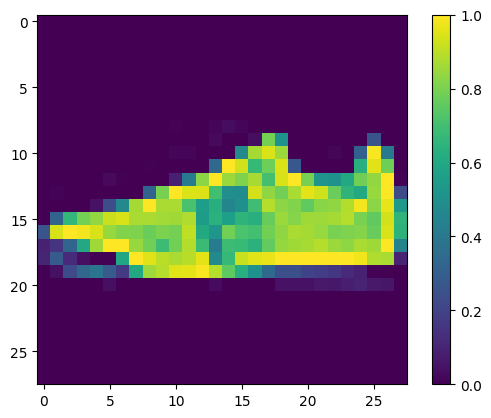

In [ ]:
# hiển thị hình ảnh từ tập dữ liệu x_train


plt.figure()
plt.imshow(x_train [0])
plt.colorbar()
plt.grid(False)

In [ ]:
# hiển thị nhãn tương ứng với hình ảnh tập train

np.where(y_train[0]==1)[0][0]

7

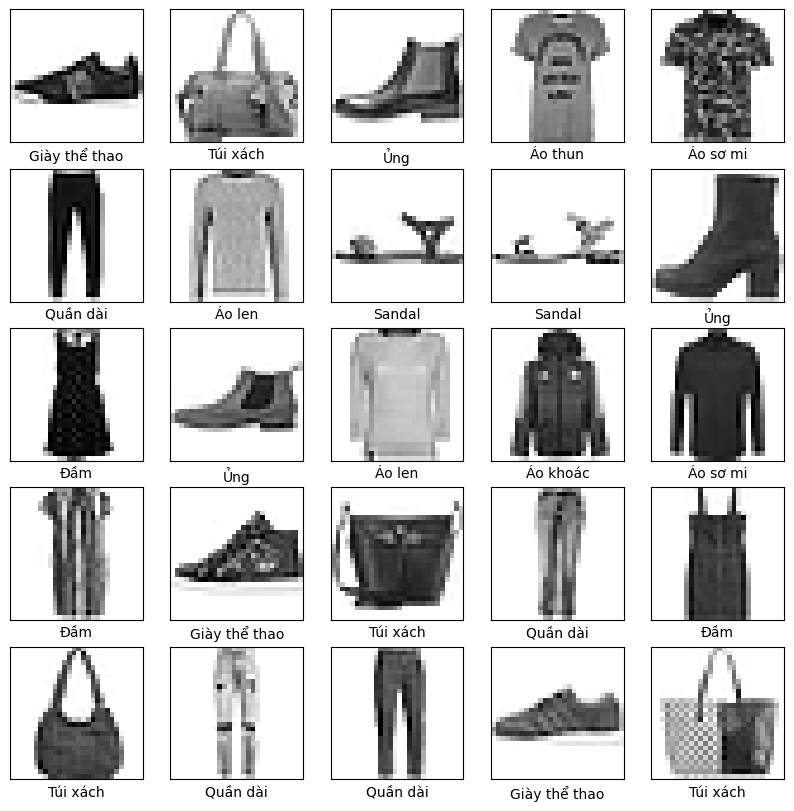

In [ ]:

plt.figure(figsize=(10,10)) #tạo figure mới kích thước 10x10 để vẽ hình ảnh
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(vi_class_names[np.where(y_train[i]==1)[0][0]]) # vì đã được mã hóa onehot

# xây dựng mô hình

In [ ]:
# kien truc vgg16
def vgg16(input_shape):
    input_tensor=Input(shape=input_shape) #Tạo tensor đầu vào có kích thước dựa trên input
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    print(x.shape)
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
    print(x.shape)
    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
    print(x.shape)
    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
    print(x.shape)



    # # Block 5
    # x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    # x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    # x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    # x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
    # print(x.shape)

    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax', name='predictions')(x)
    model = Model(inputs=input_tensor, outputs=x, name='VGG16')
    return model

model = vgg16(input_shape = (28, 28, 1))


(None, 14, 14, 64)
(None, 7, 7, 128)
(None, 3, 3, 256)
(None, 1, 1, 512)


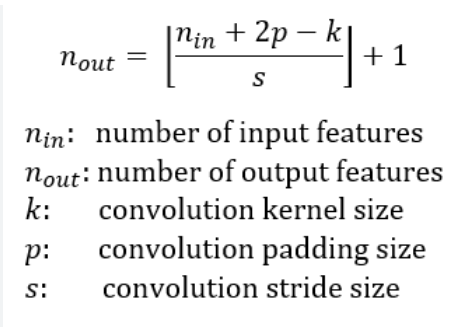

In [ ]:
# In tổng quan kiếm trúc mô hình
print(model.summary())
# Output shape - kích thucows qua từng lớp (batch_size, height, width, channels)
# Param: Số lượng tham số cần học qua mỗi lớp

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 28, 28, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 14, 14, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 14, 14, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 14, 14, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 7, 7, 128)         0     

# train mô hình

In [ ]:
# xác định quá trình đào tạo, xđ tham số
# thuật toán adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])



In [ ]:
# model.fit(x_train, y_train, epochs = 20, batch_size = 512)

train_history = model.fit(x=x_train, y=y_train,
                        validation_data=(x_validate,y_validate),
                        epochs=50, batch_size=300, verbose=1)

Epoch 1/50
160/160 [==============================] - 34s 92ms/step - loss: 1.1656 - accuracy: 0.5292 - val_loss: 0.5315 - val_accuracy: 0.8067
Epoch 2/50
160/160 [==============================] - 15s 94ms/step - loss: 0.4239 - accuracy: 0.8437 - val_loss: 0.3501 - val_accuracy: 0.8668
Epoch 3/50
160/160 [==============================] - 15s 96ms/step - loss: 0.3110 - accuracy: 0.8867 - val_loss: 0.3195 - val_accuracy: 0.8838
Epoch 4/50
160/160 [==============================] - 15s 96ms/step - loss: 0.2631 - accuracy: 0.9050 - val_loss: 0.2535 - val_accuracy: 0.9065
Epoch 5/50
160/160 [==============================] - 15s 93ms/step - loss: 0.2354 - accuracy: 0.9149 - val_loss: 0.2507 - val_accuracy: 0.9103
Epoch 6/50
160/160 [==============================] - 15s 94ms/step - loss: 0.2056 - accuracy: 0.9259 - val_loss: 0.2377 - val_accuracy: 0.9178
Epoch 7/50
160/160 [==============================] - 15s 92ms/step - loss: 0.1913 - accuracy: 0.9301 - val_loss: 0.2426 - val_accuracy:

In [ ]:
print(train_history) # in object lịch sử đào tạo
print(train_history.epoch) # in list epoch
print(train_history.history) #in lịch sử dào tạo
print(train_history.model.summary()) # in thông tin model


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
{'loss': [1.1656359434127808, 0.423948734998703, 0.3109717071056366, 0.2630768120288849, 0.23539422452449799, 0.20564347505569458, 0.19127421081066132, 0.17866097390651703, 0.15684255957603455, 0.14230458438396454, 0.13265365362167358, 0.11911701411008835, 0.11831581592559814, 0.09979083389043808, 0.09407936781644821, 0.08343394845724106, 0.07525715976953506, 0.07622341066598892, 0.06372088938951492, 0.05849502235651016, 0.054304517805576324, 0.0632433220744133, 0.05876840651035309, 0.047544024884700775, 0.047632090747356415, 0.05104084312915802, 0.03861287608742714, 0.03560442477464676, 0.034901246428489685, 0.03499891236424446, 0.03236742317676544, 0.02767925336956978, 0.030774710699915886, 0.031122634187340736, 0.030525729060173035, 0.04338368400931358, 0.02945645898580551, 0.03189055994153023, 

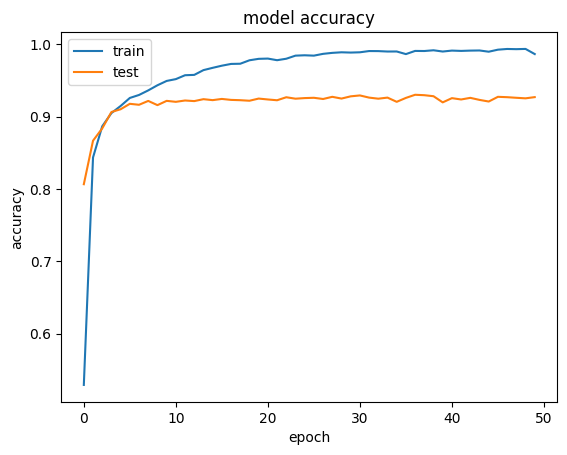

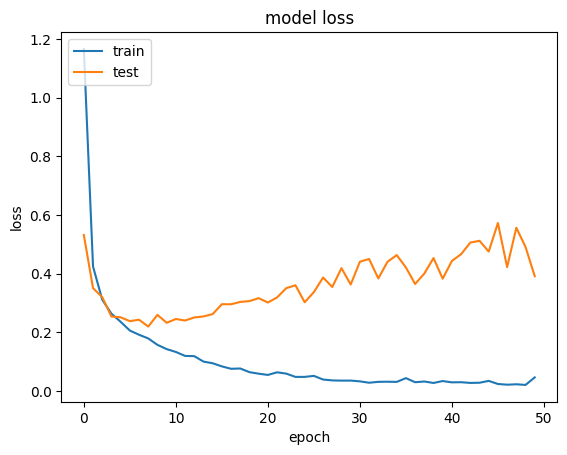

In [ ]:

import matplotlib.pyplot as plt

history = train_history
# Tóm tắt lịch sử chính xác
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Tóm tắt lịch sử tổn thất
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# test mô hình

In [ ]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

313/313 [==============================] - 3s 7ms/step - loss: 0.4501 - accuracy: 0.9240
Loss = 0.45007410645484924
Test Accuracy = 0.9240000247955322


In [ ]:
# Lấy 10 đầu tiên làm ví dụ, các lớp dự đoán (danh mục dự đoán, nghĩa là giá trị lớn nhất của đầu ra softmax)
pre = model.predict(x_test[:10]) # phương thức này giúp ta dự đoán nhãn của các giá trị dữ liệu và trả về các nhãn của dữ liệu dựa trên dữ liệu đã học
prediction = np.argmax(pre,axis=1) # trả về các chỉ số của phần tử lớn nhất theo một trục cụ thể ở đây axis=1 là theo trục dọc
print(prediction)

1/1 [==============================] - 0s 439ms/step
[9 2 1 1 6 1 4 6 5 7]


313/313 [==============================] - 2s 5ms/step
[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


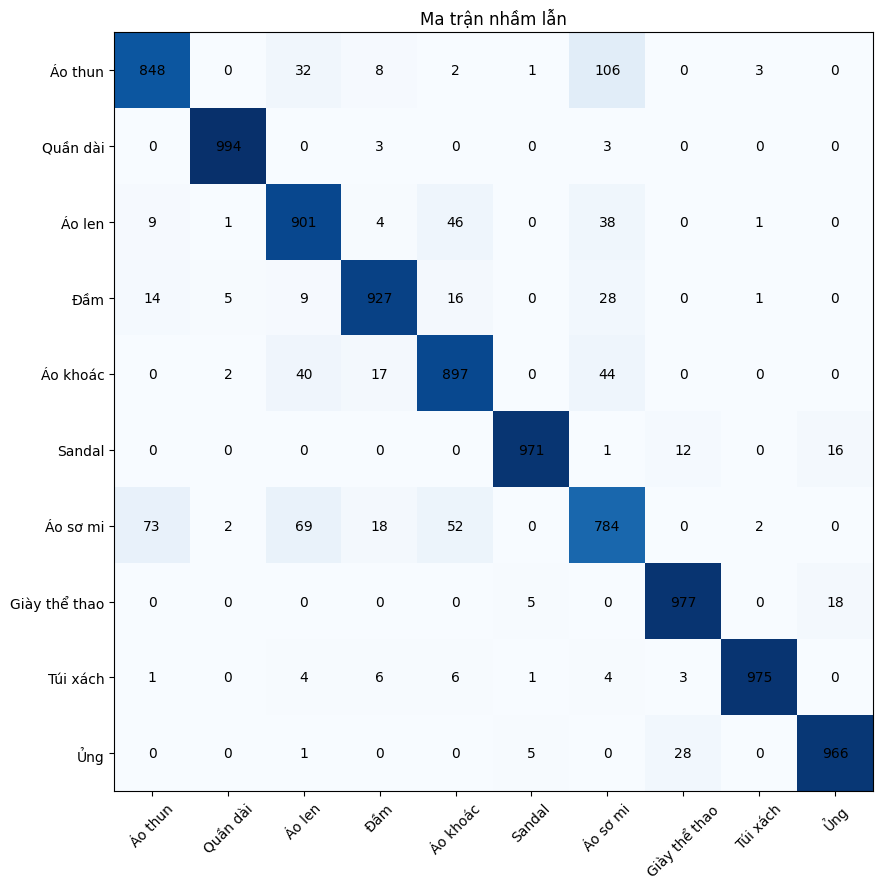

In [ ]:
# Đánh giá mô hình dùng ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax (y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
print(y_pred)
print(y_true)
# Tạo ma trận nhầm lẫn và chuẩn hóa nó theo dự đoán (cột)
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Tạo các label trục
ax.set_xticks(np.arange(len(cm)))
ax.set_yticks(np.arange(len(cm)))
ax.set_xticklabels(vi_class_names,rotation=45)
ax.set_yticklabels(vi_class_names)

# Định dạng số trên bảng
for i in range(len(cm)):
    for j in range(len(cm)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center")

# Đặt tên và hiển thị
ax.set_title("Ma trận nhầm lẫn")
fig.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# lưu lại mô hình

In [ ]:
# Sử dụng Pickle để lưu các đối tượng
import pickle
filename = '/content/drive/MyDrive/train_history.pickle'
pickle.dump(train_history, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)

In [ ]:
path = '/content/drive/MyDrive/VGG16_50epoch.h5'
model.save(path) #lưu mô hình

# Test với hình ảnh được tải lên từ hệ thống cục bộ

In [ ]:
# import thư viện
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files


In [ ]:
# Kết nối driver với gg colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# load model từ file .h5 đã lưu
file_path = '/content/drive/MyDrive/Thach_25epoch.h5'
model = keras.models.load_model(file_path)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
vi_class_names = ["Áo thun", "Quần dài", "Áo len", "Đầm", "Áo khoác",
               "Sandal", "Áo sơ mi", "Giày thể thao", "Túi xách", "Ủng"]

import pandas as pd
data = {"English Names": class_names, "Vietnamese Names": vi_class_names}
df = pd.DataFrame(data)
df

,English Names,Vietnamese Names
0,T-shirt/top,Áo thun
1,Trouser,Quần dài
2,Pullover,Áo len
3,Dress,Đầm
4,Coat,Áo khoác
5,Sandal,Sandal
6,Shirt,Áo sơ mi
7,Sneaker,Giày thể thao
8,Bag,Túi xách
9,Ankle boot,Ủng


In [1]:
# Tải ảnh lên
uploads=files.upload()

images_bytes = list(uploads.values())


NameError: name 'files' is not defined

1/1 [==============================] - 0s 18ms/step


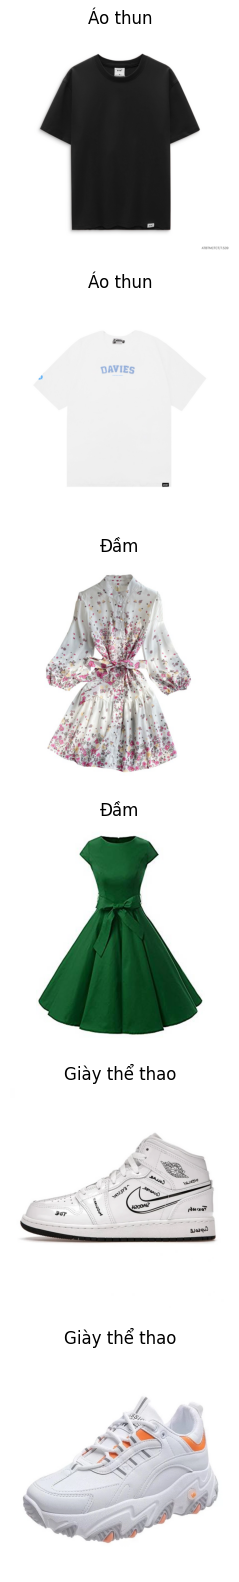

In [ ]:
num_rows = len(images_bytes)

fig, axs = plt.subplots(nrows=num_rows if num_rows > 1 else 2, ncols=1, figsize=(20, 20))

for i, image_bytes in enumerate(images_bytes):
    img = Image.open(io.BytesIO(image_bytes))

    np_img = np.array(img)
    axs[i].imshow(np_img)
    axs[i].axis('off')

    # chuyển sang đen trắng
    np_img = cv2.cvtColor(np_img, cv2.COLOR_RGB2GRAY)

    # resize sang (28, 28)
    np_img = cv2.resize(np_img,(28,28))

    # Chuẩn hóa picel hình ảnh về từ 0 đến 1
    np_img = 1 - np_img/255

    # resize sang (28, 28, 1)
    np_img = np.expand_dims(np_img, 2)

    # resize sang (1, 28, 28, 1)
    np_img = tf.expand_dims(np_img, 0)
    pre = model.predict(np_img)
    prediction=np.argmax(pre,axis=1)
    axs[i].set_title(vi_class_names[prediction[0]])

plt.show()

(28, 28)
(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 92ms/step
Túi xách


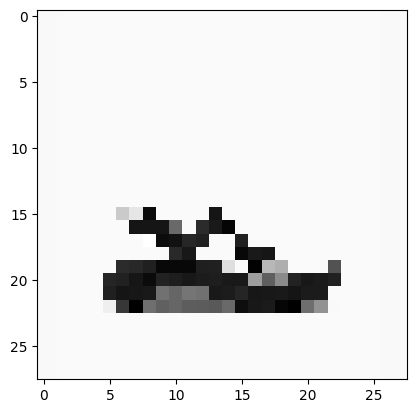

In [ ]:
img = Image.open(io.BytesIO(images_bytes[2]))
np_img = np.array(img)
np_img = cv2.cvtColor(np_img, cv2.COLOR_RGB2GRAY)

# resize sang (28, 28)
np_img = cv2.resize(np_img,(28,28))

# Chuẩn hóa picel hình ảnh về từ 0 đến 1
print(np_img.shape)

np_img = 1 - np_img/255
plt.imshow(np_img, cmap=plt.cm.binary)
# resize sang (28, 28, 1)
np_img = np.expand_dims(np_img, 2)
print(np_img.shape)

# resize sang (1, 28, 28, 1)
np_img = tf.expand_dims(np_img, 0)
print(np_img.shape)
pre = model.predict(np_img)
prediction=np.argmax(pre,axis=1)
print(vi_class_names[prediction[0]])